In [5]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.ensemble import GradientBoostingClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart, horizontal_bar_chart, HEIGHT
from sklearn.metrics import accuracy_score, f1_score, precision_score


0
0.1
0.5
0.9
1
0.1
0.5
0.9
2
0.1
0.5
0.9


<Figure size 600x450 with 0 Axes>

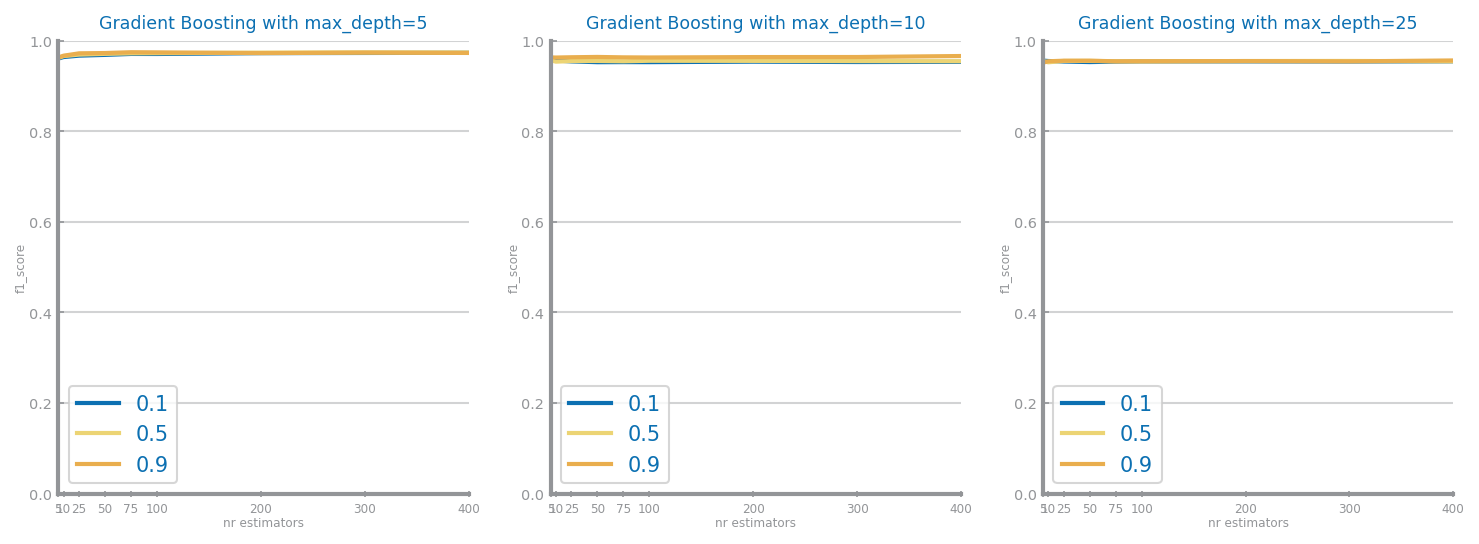

Best results with depth=5, learning rate=0.90 and 75 estimators, with f1=0.97


In [3]:
file_tag = 'air_quality_scaled_zscore'
filename = 'data/air_quality_scaled_zscore'
target = 'ALARM'

train: DataFrame = read_csv(f'{filename}_train_smote.csv')
train = train.sample(10000)
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv(f'{filename}_test.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

n_estimators = [5, 10, 25, 50, 75, 100, 200, 300, 400]
max_depths = [5, 10, 25]
learning_rate = [.1, .5, .9]
best = ('', 0, 0)
last_best = 0
best_model = None

cols = len(max_depths)
figure()
fig, axs = subplots(1, cols, figsize=(cols*HEIGHT, HEIGHT), squeeze=False)
for k in range(len(max_depths)):
    print(k)
    d = max_depths[k]
    values = {}
    for lr in learning_rate:
        print(lr)
        yvalues = []
        for n in n_estimators:
            gb = GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=lr)
            gb.fit(trnX, trnY)
            prdY = gb.predict(tstX)
            yvalues.append(f1_score(tstY, prdY, pos_label="Danger"))
            if yvalues[-1] > last_best:
                best = (d, lr, n)
                last_best = yvalues[-1]
                best_model = gb
        values[lr] = yvalues
    multiple_line_chart(n_estimators, values, ax=axs[0, k], title=f'Gradient Boosting with max_depth={d}',
                           xlabel='nr estimators', ylabel='f1_score', percentage=True)
savefig(f'lab7_images/{file_tag}_gb_study.png')
show()
print('Best results with depth=%d, learning rate=%1.2f and %d estimators, with f1=%1.2f'%(best[0], best[1], best[2], last_best))

0
0.1
0.5
0.9
1
0.1
0.5
0.9
2
0.1
0.5
0.9


<Figure size 600x450 with 0 Axes>

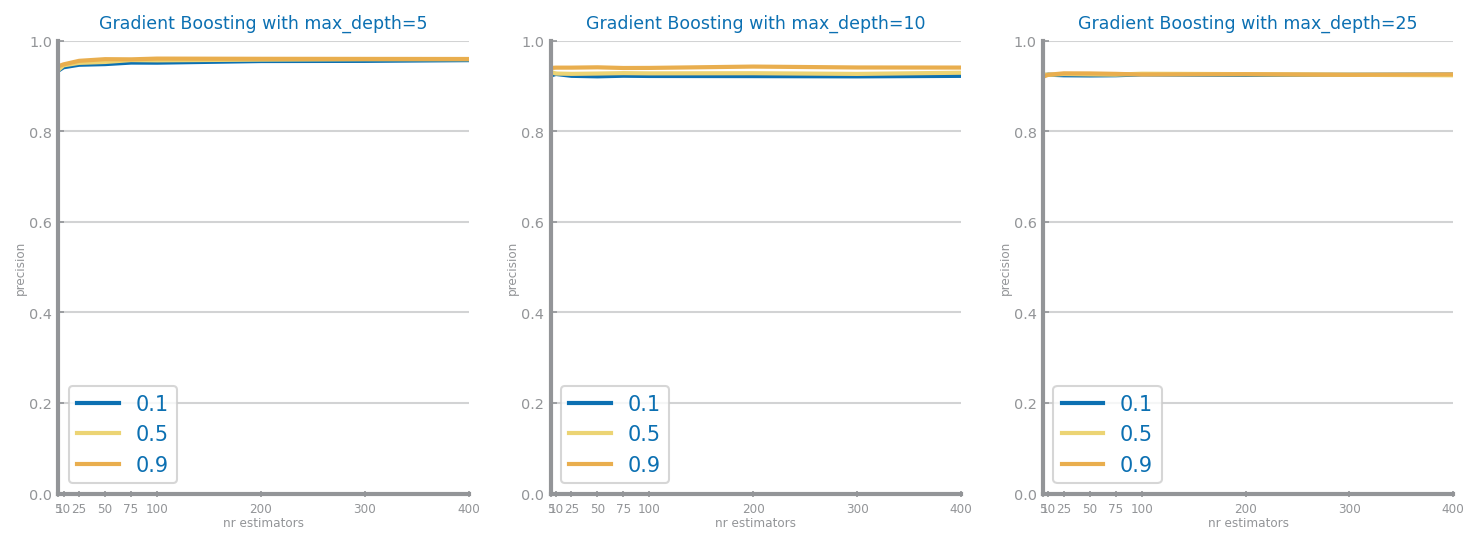

In [7]:
### PRECISION

cols = len(max_depths)
figure()
fig, axs = subplots(1, cols, figsize=(cols*HEIGHT, HEIGHT), squeeze=False)
for k in range(len(max_depths)):
    print(k)
    d = max_depths[k]
    values = {}
    for lr in learning_rate:
        print(lr)
        yvalues = []
        for n in n_estimators:
            gb = GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=lr)
            gb.fit(trnX, trnY)
            prdY = gb.predict(tstX)
            yvalues.append(precision_score(tstY, prdY, pos_label="Danger"))
        values[lr] = yvalues
    multiple_line_chart(n_estimators, values, ax=axs[0, k], title=f'Gradient Boosting with max_depth={d}',
                           xlabel='nr estimators', ylabel='precision', percentage=True)
savefig(f'lab7_images/{file_tag}_gb_precision_study.png')
show()

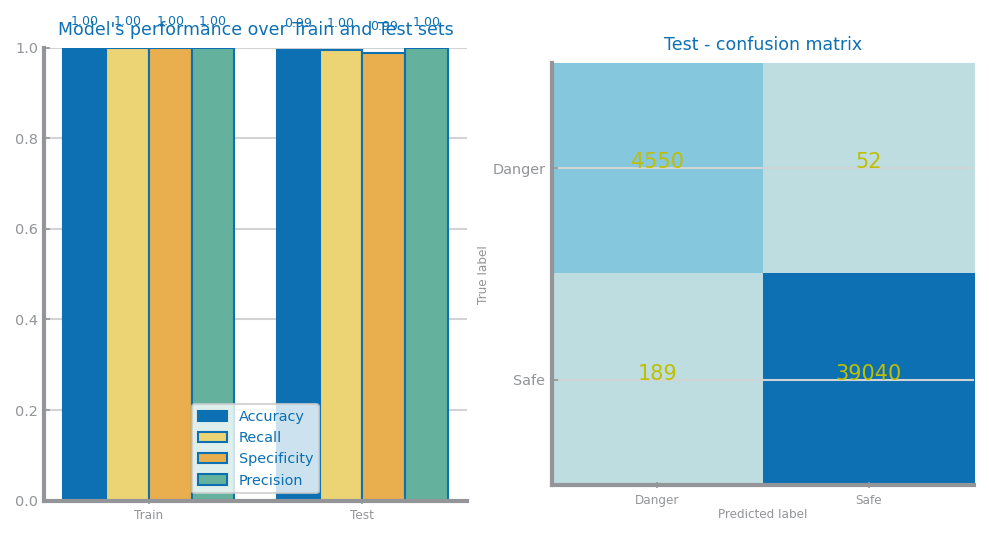

In [13]:
prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig(f'lab7_images /{file_tag}_gb_best.png')
show()

### Feature Importance

1. feature PM2.5_Mean (0.7459583829133178)
2. feature PM10_Mean (0.21770774643900911)
3. feature PM10_Max (0.010654951680601665)
4. feature PM2.5_Max (0.008838246073292911)
5. feature O3_Max (0.004124781313989773)
6. feature PM2.5_Std (0.0029590054427015896)
7. feature NO2_Min (0.001966098241890807)
8. feature PM2.5_Min (0.0008664224572893101)
9. feature Prov_EN_Gansu (0.0008453612235816238)
10. feature CO_Std (0.0008441942431518259)
11. feature O3_Mean (0.00071094439947641)
12. feature Field_1 (0.0005706022056874385)
13. feature SO2_Mean (0.0004901955487125145)
14. feature O3_Std (0.0003477768041164847)
15. feature Prov_EN_Sichuan (0.00032389266588456764)
16. feature NO2_Mean (0.00029756878353885913)
17. feature CO_Min (0.00027967432410883265)
18. feature SO2_Min (0.00026987690340110853)
19. feature Prov_EN_Shanxi (0.00024579748454088606)
20. feature SO2_Max (0.00021659475505497662)
21. feature date_5 (0.00021358733575497656)
22. feature NO2_Std (0.00020305197525869153)
23. feature PM

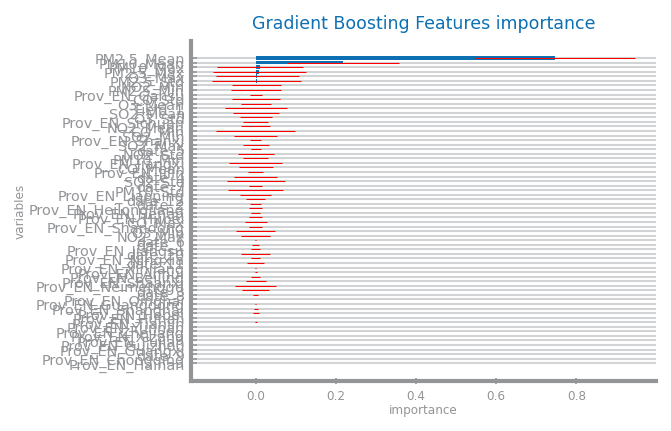

In [9]:
from numpy import std, argsort

variables = train.columns
importances = best_model.feature_importances_
indices = argsort(importances)[::-1]
stdevs = std([tree[0].feature_importances_ for tree in best_model.estimators_], axis=0)
elems = []
for f in range(len(variables)):
    elems += [variables[indices[f]]]
    print(f'{f+1}. feature {elems[f]} ({importances[indices[f]]})')

figure()
horizontal_bar_chart(elems, importances[indices], stdevs[indices], title='Gradient Boosting Features importance', xlabel='importance', ylabel='variables')
savefig(f'lab7_images/{file_tag}_gb_ranking.png')

### Feature Selection

### Overfitting

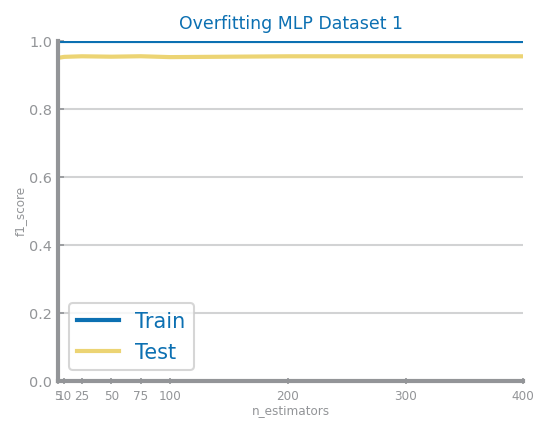

In [11]:
lr = 0.7
max_depth = 10
eval_metric = f1_score
y_tst_values = []
y_trn_values = []
for n in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=lr)
    gb.fit(trnX, trnY)
    prd_tst_Y = gb.predict(tstX)
    prd_trn_Y = gb.predict(trnX)
    y_tst_values.append(eval_metric(tstY, prd_tst_Y, pos_label="Danger"))
    y_trn_values.append(eval_metric(trnY, prd_trn_Y,pos_label="Danger"))
evals = {'Train': y_trn_values, 'Test': y_tst_values}
multiple_line_chart(n_estimators, evals, ax = None, title=f'Overfitting MLP Dataset 1', xlabel='n_estimators', ylabel='f1_score', percentage=True)
savefig('lab7_images/overfitting_gradient_boosting_ds2.png')